# CPSC 330 - Applied Machine Learning 

## Homework 4: Logistic regression, hyperparameter optimization 
### Associated lectures: [Lectures 7, 8](https://github.com/UBC-CS/cpsc330-2022W2) 

**Due date: Feb 10, 11:59pm**


## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

## Instructions 
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- **Be kind** and respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

<br><br><br><br>

## Exercise 1: Implementing `DummyClassifier` 
<hr>
rubric={points:25}

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.

As a reminder, `DummyClassifier` is meant as a baseline and is generally the worst possible "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get your started, I have given you a `return` statement in each case that returns the correct data type: 
- `fit` can return nothing, 
- `predict` returns an array whose size is the number of examples, 
- `predict_proba` returns an array whose size is the number of examples x 2, and 
- `score` returns a number.

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data, which is the behaviour of `DummyClassifier(strategy='prior')`. Your `score` function should call your `predict` function. Again, you can compare with `DummyClassifier` using the code below.

To simplify this question, you can assume **binary classification**, and furthermore that these classes are **encoded as 0 and 1**. In other words, you can assume that `y` contains only 0s and 1s. The real `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "mouse", etc.

In [2]:
class MyDummyClassifier:
    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0s and 1s.
    """
    
    def fit(self, X, y):
        """
        The implementation of this method is as follows:
        - num_ones stores the number of ones in y
        - proportion variable stores the proportion of ones in y
        - self.prediction attribute stores 0 if the proportion of ones is less than half, 1 otherwise.
        - self.probabilities stores an array of proportion of 0 and 1
        """
        num_ones = np.array(y[y==1]).sum()
        proportion = num_ones / len(y)
        
        self.prediction = 0 if proportion < 0.5 else 1
        self.probabilities = [1-proportion, proportion]
        

    def predict(self, X):
        """
        The Implementation of this method can be explained as follows:
        - predictions variable is an array of the most common label in y (stored in the self.prediction attribute)
        - self.predictions attribute is the prediction variable turned into a numpy array
        I made the self.predictions attribute to be a numpy array in order to take advantage of numpy array properties
        
        """
        predictions = [self.prediction] * len(X)
        self.predictions = np.array(predictions)
        return self.predictions
    
    
    def predict_proba(self, X):
        """
        The implementation of this method can be explained as follows:
        - proba is an array of the self.probabilities attribute. It has the same length as the length of X
        - I returned a numpy array of proba to take advantage of numpy properties 
        """
        proba = [self.probabilities] * len(X)
        return np.array(proba)

    def score(self, X, y):
        """
        The implementation of this method can be explained  as follows:
        - scores is a numpy boolean array array. The entries are true if the prediction is the same as the actual
        - I return a number which is the proportion of the predictions that were correct
        """
        scores = (np.array(y) == self.prediction)
        return sum(list(scores))/len(list(scores))

Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore the different cases (or automate this with a loop or random seeds).

In [3]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

Below are some tests for `predict_proba`.

In [4]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

Below are some tests for `score`.

In [5]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be looking at a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` into this directory. As usual, please do not submit the dataset when you submit the assignment. 

In [6]:
tweets_df = pd.read_csv("realdonaldtrump.csv", index_col=0)
tweets_df.head()

,link,content,date,retweets,favorites,mentions,hashtags
id,,,,,,,
1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [7]:
tweets_df.shape

(43352, 7)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [8]:
y = tweets_df["retweets"] > 10_000

To make predictions, we'll be using only the content (text) of the tweet. 

In [9]:
X = tweets_df["content"]

For the purpose of this assignment, you can ignore all the other columns in the original dataset.

#### 2(a) ordering the steps
rubric={points:8}

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

- Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
- Add a short comment to each block to describe what the code is doing.

In [10]:
# Splitting Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

# Creating a CountVectorizer object for bag of words representation
countvec = CountVectorizer(stop_words="english")

# Initializing a logistic regression model
lr = LogisticRegression(max_iter=1000)

# Creating a pipeline for the preprocessing step and the logistic regression model
pipe = make_pipeline(countvec, lr)

# Performing a 5-fold crossvalidation, storing results in a pandas dataframe
cross_val_results = pd.DataFrame(
    cross_validate(pipe, X_train, y_train, return_train_score=True)
)


# Outputing the average scores(train score and validation score) and times(score time and fit time)
cross_val_results.mean()

fit_time       1.681678
score_time     0.149308
test_score     0.898475
train_score    0.967952
dtype: float64

<br><br>

#### 2(b) Cross-validation fold sub-scores
rubric={points:3}

Above we averaged the scores from the 5 folds of cross-validation. 

- Print out the 5 individual scores. 
    - (Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores.)
- Are the 5 scores close to each other or spread far apart? 
  - (This is a bit subjective, answer to the best of your ability.)
- How does the size of this dataset (number of rows) compare to the cities dataset we have been using in class? How does this relate to the different sub-scores from the 5 folds?

**SOLUTION**

In [11]:
scores = cross_val_results[['train_score', 'test_score']].rename(columns={'test_score': 'validation score'})
scores

,train_score,validation score
0,0.966976,0.895587
1,0.968206,0.898047
2,0.967975,0.896971
3,0.968667,0.897893
4,0.967938,0.903876


From the dataframe above, we see that the results do not spread far apart. The validation scores are around the 90% mark while the train scores are around the 96% mark. This is a much better performance than the on the dataset  in the lecture. This is because, This is a much larger dataset, and hence, on every fold, it is able to train on more data, giving it a better understanding of the distributions, hence performing better on the validation data.

<br><br>

#### 2(c) baseline
rubric={points:3}

By the way, are these scores any good? 

- Run `DummyClassifier` (or `MyDummyClassifier`!) on this dataset.
- Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
- Is it necessary to use `CountVectorizer` here? Briefly explain.

In [12]:
dummy_model = MyDummyClassifier()
dummy_model.fit(X_train, y_train)
train_score = dummy_model.score(X_train, y_train)
test_score = dummy_model.score(X_test, y_test)

print(f"Dummy Train Score: {train_score:.3f}\n"\
      f"Dummy Test Score: {test_score:.3f}")

Dummy Train Score: 0.735
Dummy Test Score: 0.741


The logistic regression model performs much better than the dummy model. 
It is not necessary to include `CountVectorizer` because the dummy model doesnt care about the content of the predictors (the text). It only picks the most common label in the `y` column. It would be of no importance to vectorize the text since the y column is the same for both processed and unprocessed dataframes.

<br><br>

#### 2(d) probability scores
rubric={points:5}

Here we train a logistic regression classifier on the entire training set: 

(Note: this is relying on the `pipe` variable from 2(a) - you'll need to redefine it if you overwrote that variable in between.)

In [13]:
pipe.fit(X_train, y_train);

Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Print out the tweet and the associated probability score.

Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

In [14]:
# Obtainig Probability scores as a numpy array
predict_proba_numpy = pipe.predict_proba(X_test)

# Changing predict_proba scores to pandas dataframe and taking the second column
predict_proba_df = pd.DataFrame(pipe.predict_proba(X_test))[1]

# Obtaining the index of the largest probability of going viral
max_value_index = np.argmax(predict_proba_df)

# Obtaining the tweet with at the index as a pandas dataframe
tweet_df = pd.DataFrame(pd.DataFrame(X_test).iloc[max_value_index]).T.reset_index()["content"]

# Printing the probability score
print(f"Probability Score: {predict_proba_df[max_value_index]}")

# Outputting the tweet as a string
tweet_df.item()

Probability Score: 0.9999996937246393


'“FBI texts have revealed anti-Trump Bias.” @ FoxNews Big News, but the Fake News doesn’t want to cover. Total corruption - the Witch Hunt has turned out to be a scam! At some point soon the Mainstream Media will have to cover correctly, too big a story!'

<br><br>

#### 2(e) coefficients
rubric={points:4}

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `make_pipeline` object as follows:


In [15]:
vec_from_pipe = pipe.named_steps["countvectorizer"]
lr_from_pipe = pipe.named_steps["logisticregression"]

Using these extracted components above, display
- the 5 words with the highest coefficients and 
- the 5 words with the smallest coefficients.

In [16]:
from typing import List
# Obtainig the Coefficients as a numpy array
lr_coeffs: np.array = lr_from_pipe.coef_[0]

# Creating a python list that with an enumeration of the coefficients
lr_index_coeffs: List[tuple] = [(coef, num) for num, coef in enumerate(lr_coeffs)]

# Sorting the list from largest coefficient to the lowest
lr_index_coeffs.sort(key= lambda x: x[0], reverse=True)

# Obtaining the 5 largest coefficients and their indices as a list of tuples
top_5: List[tuple] = lr_index_coeffs[:5]

# Obtaining the bottom 5 coefficients and their indices as a list of tuples
bottom_5: List[tuple] = list(reversed(lr_index_coeffs[-5:]))

# Obtaining just the indices of the highest coefficients
tops: List[int] = [index for coef, index in top_5]

# Obtaining just the indices of the lowest coefficients
bottoms: List[int] = [index for coef, index in bottom_5]

# Creating a dictionary whose contents are the vocabulary. The keys and values are reversed
new_vocab = {word: index for index, word in vec_from_pipe.vocabulary_.items()}

# Obtaining the words with the highest coefficients as a python list
highest_coefficient_words: List[str] = [new_vocab[index] for index in tops]

# Obtaining the words with the lowest coefficients as a python list of strings
lowest_coefficient_words: List[str] = [new_vocab[index] for index in bottoms]

# Putting them in a form of a pandas dataframe
extracts_df: pd.DataFrame = pd.DataFrame({"Highest Coefficient Words": highest_coefficient_words,
                           "Lowest Coefficient Words": lowest_coefficient_words})
    
# Displaying the results
extracts_df

,Highest Coefficient Words,Lowest Coefficient Words
0,obamagate,realdonaldtrump
1,harassment,trump2016pic
2,coronavirus,barackobama
3,mini,donaldtrump
4,fake,celebapprentice


<br><br>

#### 2(f) Running a cross-validation fold without sklearn tools 
rubric={points:8}

Sklearn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. 

**Your tasks:**

1. Compute logistic regression's validation score on the first fold, that is, train on 80% and validate on 20% of the training data (`X_train`) without using sklearn `Pipeline` or `cross_validate` or `cross_val_score`. Store the score of the fold in a variable called `fold_score`. Recall that `cross_validation` in `sklearn` does not shuffle the data by default.    

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split with `train_test_split` and `shuffle=False`):

In [17]:
# Count Vectorizer object
countvec = CountVectorizer(stop_words="english")

# Logistic Regression Model Initialization
lr = LogisticRegression(max_iter=1000)

# Splitting Data
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, 
                                                                  test_size=0.2, shuffle=False)

# Fitting `countvec` and transforming the count vectorizer on the training split
X_train_split = countvec.fit_transform(X_train_split)

# Transforming test split
X_valid = countvec.transform(X_valid)

# Fitting Logistic regression model
lr.fit(X_train_split, y_train_split)

# Checking the score on validation data
fold_score = lr.score(X_valid, y_valid)

print(f"Validation score: {fold_score:.2f}")

Validation score: 0.90


<br><br><br><br>

## Exercise 3: hyperparameter optimization
<hr>

#### 3(a)
rubric={points:4}

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. 

Based on the plot/output, what value of `max_features` seems best? Briefly explain.

> **Note:** the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

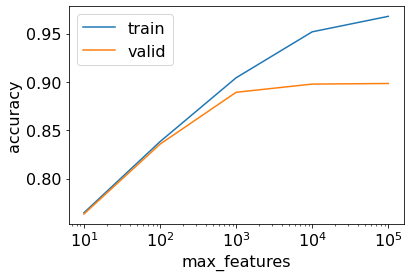

In [18]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10_000, 100_000]

for mf in max_features:
#     print(mf)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=mf),
        LogisticRegression(max_iter=1000),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features")
plt.ylabel("accuracy");

In [19]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

,max_features,train,cv
0,10,0.764701,0.763425
1,100,0.838270,0.835671
2,1000,0.904380,0.889371
3,10000,0.951936,0.897860
4,100000,0.967952,0.898475


**SOLUTION**

Based on the plot, 100,000 value for the `max_features` hyperparameter seems to be the best because it gives the highest cross validation score. However, it overfits too hence some sort of reguralization might be needed.

<br><br>

#### 3(b)
rubric={points:6}

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. 

Based on the plot, what value of `C` seems best?

> **Note:** the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

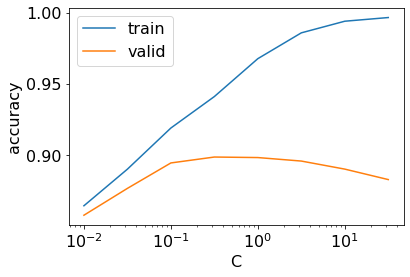

In [20]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-2, 2, 0.5)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=None),
        LogisticRegression(max_iter=1000, C=C),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [21]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

,C,train,cv
0,0.010000,0.864612,0.857969
1,0.031623,0.890316,0.876822
2,0.100000,0.919227,0.894692
3,0.316228,0.941333,0.898844
4,1.000000,0.967952,0.898475
5,3.162278,0.986091,0.896014
6,10.000000,0.994256,0.890355
7,31.622777,0.996840,0.883004


**SOLUTION**
***
Based on the plots above, the best value of C is `0.316228` because it gives us the highest validation score. However This to overfits a lot, hence some other form of hyperparameter tuning might be needed

<br><br>

#### 3(c) Hyperparameter optimization 
rubric={points:10}

Start with the pipeline `pipe` below.

**Your tasks:**
- Create a `GridSearchCV` object named `grid_search` to jointly optimize `max_features` of `CountVectorizer` and `C` of `LogisticRegression` across all the combinations of values we tried above. 
- What are the best values of `max_features` and `C` according to your grid search? 
- Store them in variables `best_max_features` and `best_C`, respectively.  
- Store the best score returned by the grid search in a variable called `best_score`. 

> The code might be a bit slow here. Setting `n_jobs=-1` should speed it up if you have a multi-core processor.

In [22]:
# Creating parameter grid
param_grid = {"countvectorizer__max_features": max_features,
              "logisticregression__C": C_vals}

# Creating a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid = param_grid, n_jobs=-1)

# Fitting the grid_search
grid_search.fit(X_train, y_train)

# Obtaining the best max_feature hyperparameter
best_max_features = grid_search.best_params_['countvectorizer__max_features']

# Obtainig the best `C` hyperparameter
best_C = grid_search.best_params_['logisticregression__C']

# Obtaining The Best Score
best_score = grid_search.best_score_

# Printing the hyperparameters and best score
print(f'Best Max Feature: {best_max_features:,}\n'\
      f'Best Logistic C: {best_C:.4f}\n'\
      f'Best Score: {best_score:4f}')

Best Max Feature: 100,000
Best Logistic C: 0.3162
Best Score: 0.898844


<br><br>

#### 3(d) Discussion 
rubric={points:4}

- Do the best values of hyperparameters found by Grid Search agree with what you found in 3(a) and 3(b)? 
- **Generally speaking**, _should_ these values agree with what you found in parts  3.1 and 3.2? Why or why not? 

**Solution**

Yes the hyperparameters found by Grid Search agree with what I got in 3(a) and 3(b). However, generally speaking, the values do not need to agree. This is because the approach in 3(a) only looks at the best max_features parameter on the default parameter of C, and 3b only focuses on the C hyperparameter. GridSearch on the other hand looks at all the possible compinations of the C hyperparameters and the max_features and picks the best combination. This is a more brute approach and can only provide results that are at least as good as the approach in 3a, other wise better results. 


#### 3(e) Test score
rubric={points:2}

- Evaluate your final model on the test set. Store the test accuracy in the variable called `test_score`.

In [23]:
test_score = grid_search.score(X_test, y_test)
print(f"Test Score: {test_score:.2f}")

Test Score: 0.90


#### 3(f) Discussion of Test Score
rubric={points:4}

- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

**SOLUTION**

The test accuracy (90%) is slightly better than the validation accuracy (89.88%). They are not significantly differnet. The test accuracy is slightly better than the validation accuracy. This an indication that the model has generalised well. 

## Exercise 4: Very short answer questions
rubric={points:8}

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`?  
2. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
3. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?
4. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?

**SOLUTION**


1. `fit_transform` on test data fits the `Countvectorizer` again on the test data, which updates the parameters of the `CountVectorizer` object which is bad. Ideally, we should just fit on the train set and use the parameters to update the transform the test set
2. I would choose `predict_proba` because, with results from `predict_proba`, I can obtain the results from `predict`. Furthermore, `predict_proba` helps give a better understanding of the model results since we know how confident out model is in an output.
3. Randomized search is faster than gridsearch when computing. It can also find better hyperparameters since it randomly looks though different hyperparameters that are not predefined.
4. The golden rule is very important because it helps us evaluate our model beter. While it is a great practie to follow it, saying that violeting it will give you a worst classifier might be a false statement since you might get lucky and get a good classifier without  following the golden rule.

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 